<a href="https://colab.research.google.com/github/ahmadcah/project_pembelajaran_mesin_2018-198/blob/main/GoogleColab/artificial_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import tarfile

tar = tarfile.open("/content/drive/MyDrive/places365standard_easyformat.tar", "r:")
tar.extractall(path='/content')
tar.close()

In [3]:
train_dir = "/content/places365_standard/train"
validation_dir = "/content/places365_standard/val"

train_list_dir = os.listdir(train_dir)
validation_list_dir = os.listdir(validation_dir)

In [4]:
# Cek Folder
print(train_list_dir)
print(validation_list_dir)

['coast', 'manufactured_home', 'chalet', 'pizzeria', 'cafeteria', 'bus_interior', 'nursery', 'amusement_park', 'ticket_booth', 'lecture_room', 'art_school', 'bazaar-outdoor', 'balcony-interior', 'boardwalk', 'hangar-indoor', 'village', 'hotel-outdoor', 'swimming_pool-indoor', 'dam', 'railroad_track', 'underwater-ocean_deep', 'amusement_arcade', 'movie_theater-indoor', 'swamp', 'tree_farm', 'fishpond', 'beauty_salon', 'pond', 'staircase', 'hardware_store', 'windmill', 'art_studio', 'attic', 'utility_room', 'fabric_store', 'cabin-outdoor', 'viaduct', 'beer_hall', 'sushi_bar', 'mountain_path', 'rock_arch', 'pet_shop', 'science_museum', 'hayfield', 'storage_room', 'army_base', 'hotel_room', 'pub-indoor', 'harbor', 'bookstore', 'mosque-outdoor', 'islet', 'formal_garden', 'mountain_snowy', 'wheat_field', 'galley', 'candy_store', 'trench', 'garage-indoor', 'general_store-outdoor', 'desert-vegetation', 'ice_shelf', 'flea_market-indoor', 'cliff', 'botanical_garden', 'plaza', 'zen_garden', 'beac

<h3>Data Preprocessing</h3>

In [18]:
import tensorflow as tf

training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=126
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=126
)

Found 1803460 images belonging to 365 classes.
Found 36500 images belonging to 365 classes.


<h3>Definisikan Model</h3>

In [19]:
img_input = tf.keras.layers.Input(shape=(256, 256, 3)) 
x = tf.keras.layers.Flatten()(img_input) 
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x) 
output = tf.keras.layers.Dense(365, activation='softmax')(x) 

# Definisikan modelnya
model = tf.keras.Model(img_input, output)

In [11]:
# Tampilkan model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 196608)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              201327616 
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              104960

In [21]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

In [22]:
H = model.fit(train_generator,
              steps_per_epoch=20, 
              epochs=50, 
              validation_data = validation_generator,
              verbose = 1,
              validation_steps=3)

Epoch 1/50
20/20 [==============================] - 10s 458ms/step - loss: 23.1363 - acc: 0.0036 - val_loss: 5.9843 - val_acc: 0.0000e+00
Epoch 2/50
20/20 [==============================] - 9s 445ms/step - loss: 5.9382 - acc: 0.0052 - val_loss: 5.9056 - val_acc: 0.0000e+00
Epoch 3/50
20/20 [==============================] - 9s 445ms/step - loss: 5.9259 - acc: 0.0044 - val_loss: 5.9191 - val_acc: 0.0053
Epoch 4/50
20/20 [==============================] - 9s 439ms/step - loss: 5.9064 - acc: 0.0028 - val_loss: 5.9343 - val_acc: 0.0026
Epoch 5/50
20/20 [==============================] - 9s 433ms/step - loss: 5.9042 - acc: 0.0036 - val_loss: 5.9166 - val_acc: 0.0053
Epoch 6/50
20/20 [==============================] - 9s 436ms/step - loss: 5.9045 - acc: 0.0020 - val_loss: 5.9112 - val_acc: 0.0053
Epoch 7/50
20/20 [==============================] - 9s 429ms/step - loss: 5.8934 - acc: 0.0024 - val_loss: 5.8995 - val_acc: 0.0026
Epoch 8/50
20/20 [==============================] - 9s 435ms/step 

<h3>Evaluasi Model</h3>

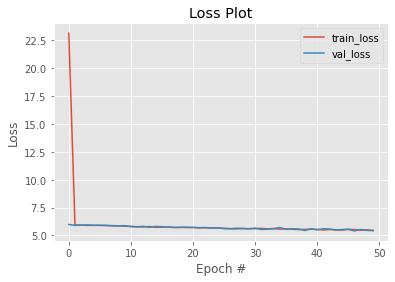

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

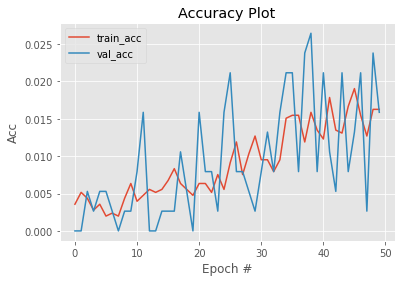

In [26]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

# **Birds**

In [27]:
import tensorflow_datasets as tfds

splits = ['train', 'test[:50%]', 'test[50%:]']
splits, info = tfds.load('CaltechBirds2011', split=splits, shuffle_files=True, with_info=True)
(train_examples, validation_examples, test_examples) = splits
train_len = len(list(train_examples))
validation_len = len(list(validation_examples))
test_len = len(list(test_examples))
print(train_len)
print(validation_len)
print(test_len)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/caltech_birds2011/0.1.1.incompleteR47JM2/caltech_birds2011-train.tfrecord


  0%|          | 0/5994 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/caltech_birds2011/0.1.1.incompleteR47JM2/caltech_birds2011-test.tfrecord


  0%|          | 0/5794 [00:00<?, ? examples/s]

Dataset caltech_birds2011 downloaded and prepared to /root/tensorflow_datasets/caltech_birds2011/0.1.1. Subsequent calls will reuse this data.
5994
2897
2897


In [28]:
num_examples = 500 
num_classes = 200
BATCH_SIZE = 25
IMAGE_SIZE = (250,250)

def format_image(features):
  image = features['image']
  image = tf.image.resize(image, IMAGE_SIZE) / 255.0
  return  image, features['label']

train_batches = train_examples.shuffle(num_examples).map(format_image).batch(BATCH_SIZE)
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE)
test_batches = test_examples.map(format_image).batch(BATCH_SIZE)

In [40]:
img_input = tf.keras.layers.Input(shape=(250, 250, 3)) 
x = tf.keras.layers.Flatten()(img_input) 
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x) 
output = tf.keras.layers.Dense(num_classes, activation='softmax')(x) 

# Definisikan modelnya
model2 = tf.keras.Model(img_input, output)

In [41]:
model2.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 187500)            0         
_________________________________________________________________
dense_36 (Dense)             (None, 1024)              192001024 
_________________________________________________________________
dense_37 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_38 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_39 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_40 (Dense)             (None, 1024)              1049

In [46]:
model2.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

In [36]:
callbacksEarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
class CallbackAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if logs.get('acc') > 0.98 and logs.get('val_acc') > 0.98:
            self.model.stop_training = True

In [48]:
H2 = model2.fit(train_batches,
                epochs=50, 
                validation_data=validation_batches)

Epoch 1/50
240/240 [==============================] - 12s 49ms/step - loss: 5.2996 - acc: 0.0018 - val_loss: 5.2984 - val_acc: 0.0059
Epoch 2/50
240/240 [==============================] - 12s 49ms/step - loss: 5.2996 - acc: 0.0020 - val_loss: 5.2985 - val_acc: 0.0059
Epoch 3/50
240/240 [==============================] - 12s 49ms/step - loss: 5.2996 - acc: 0.0023 - val_loss: 5.2985 - val_acc: 0.0055
Epoch 4/50
240/240 [==============================] - 12s 49ms/step - loss: 5.2996 - acc: 0.0027 - val_loss: 5.2985 - val_acc: 0.0062
Epoch 5/50
240/240 [==============================] - 13s 49ms/step - loss: 5.2996 - acc: 0.0023 - val_loss: 5.2984 - val_acc: 0.0059
Epoch 6/50
240/240 [==============================] - 12s 49ms/step - loss: 5.2996 - acc: 0.0023 - val_loss: 5.2984 - val_acc: 0.0059
Epoch 7/50
240/240 [==============================] - 12s 49ms/step - loss: 5.2996 - acc: 0.0018 - val_loss: 5.2984 - val_acc: 0.0055
Epoch 8/50
240/240 [==============================] - 12s 49ms

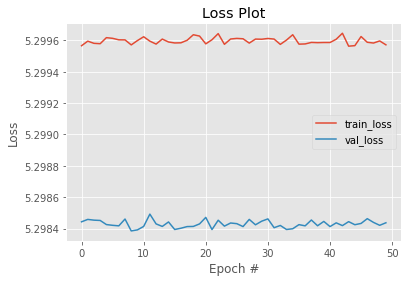

In [51]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

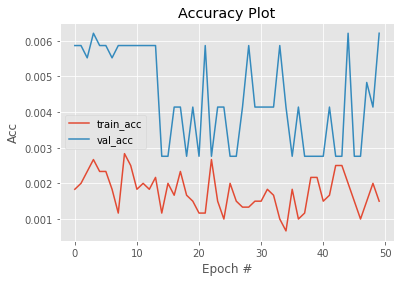

In [49]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H2.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import classification_report

test_labels=np.concatenate([y for x, y in test_batches], axis=0)
pred = model2.predict(test_batches)
y_pred = np.argmax(pred, axis=-1)
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        15
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        20
          14       0.00      0.00      0.00        16
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        15
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
